###### Introduction to Network Analysis 2023/24 (vii)

## Community detection, blockmodeling & stochastic block models

Browse [CDlib](https://cdlib.readthedocs.io/en/latest/), [NetworkX](https://networkx.org/documentation/stable/reference/algorithms/community.html), [graph-tool](https://graph-tool.skewed.de/static/doc/demos/inference/inference.html) or other library for implementations of network community detection and graph partitioning algorithms. Select an algorithm which you will be using in the exercises below. For instance, select one of most popular algorithms such as hierarchical optimization of modularity known as Louvain algorithm, map equation algorithm called Infomap, simple label propagation algorithm, hierarchical clustering based on edge betweenness, Markov clustering algorithm, (degree-corrected) stochastic block model etc.

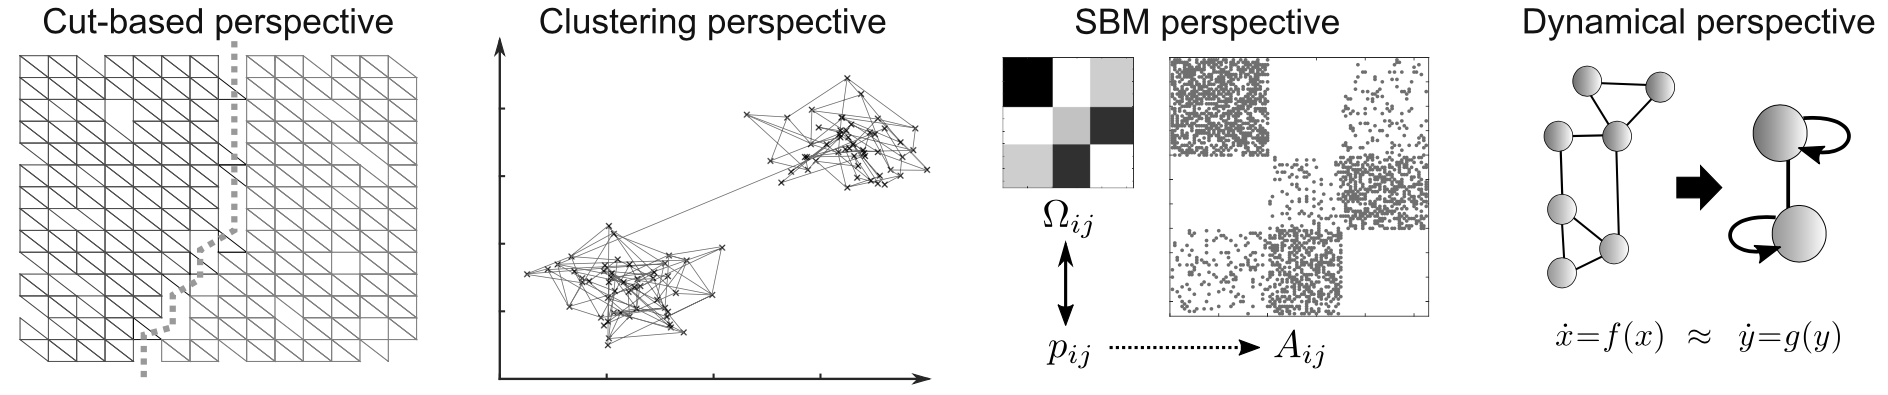

### II. Community detection in networks with node metadata

You are given three larger networks with some metadata associated with each node.

+ Java class dependency network with 54 packages ([cdn_java.net](http://lovro.fri.uni-lj.si/ina/nets/cdn_java.net))
+ WikiLeaks cable reference network with 246 embassies ([wikileaks.net](http://lovro.fri.uni-lj.si/ina/nets/wikileaks.net))
+ US college Facebook social network with 66 dormitories ([dormitory.net](http://lovro.fri.uni-lj.si/ina/nets/dormitory.net))



1. **(code)** Apply the algorithm to larger networks and test whether the revealed communities coincide with metadata associated with the nodes of these networks. You should apply the algorithm to each network multiple times and compare partitions using some standard measure.

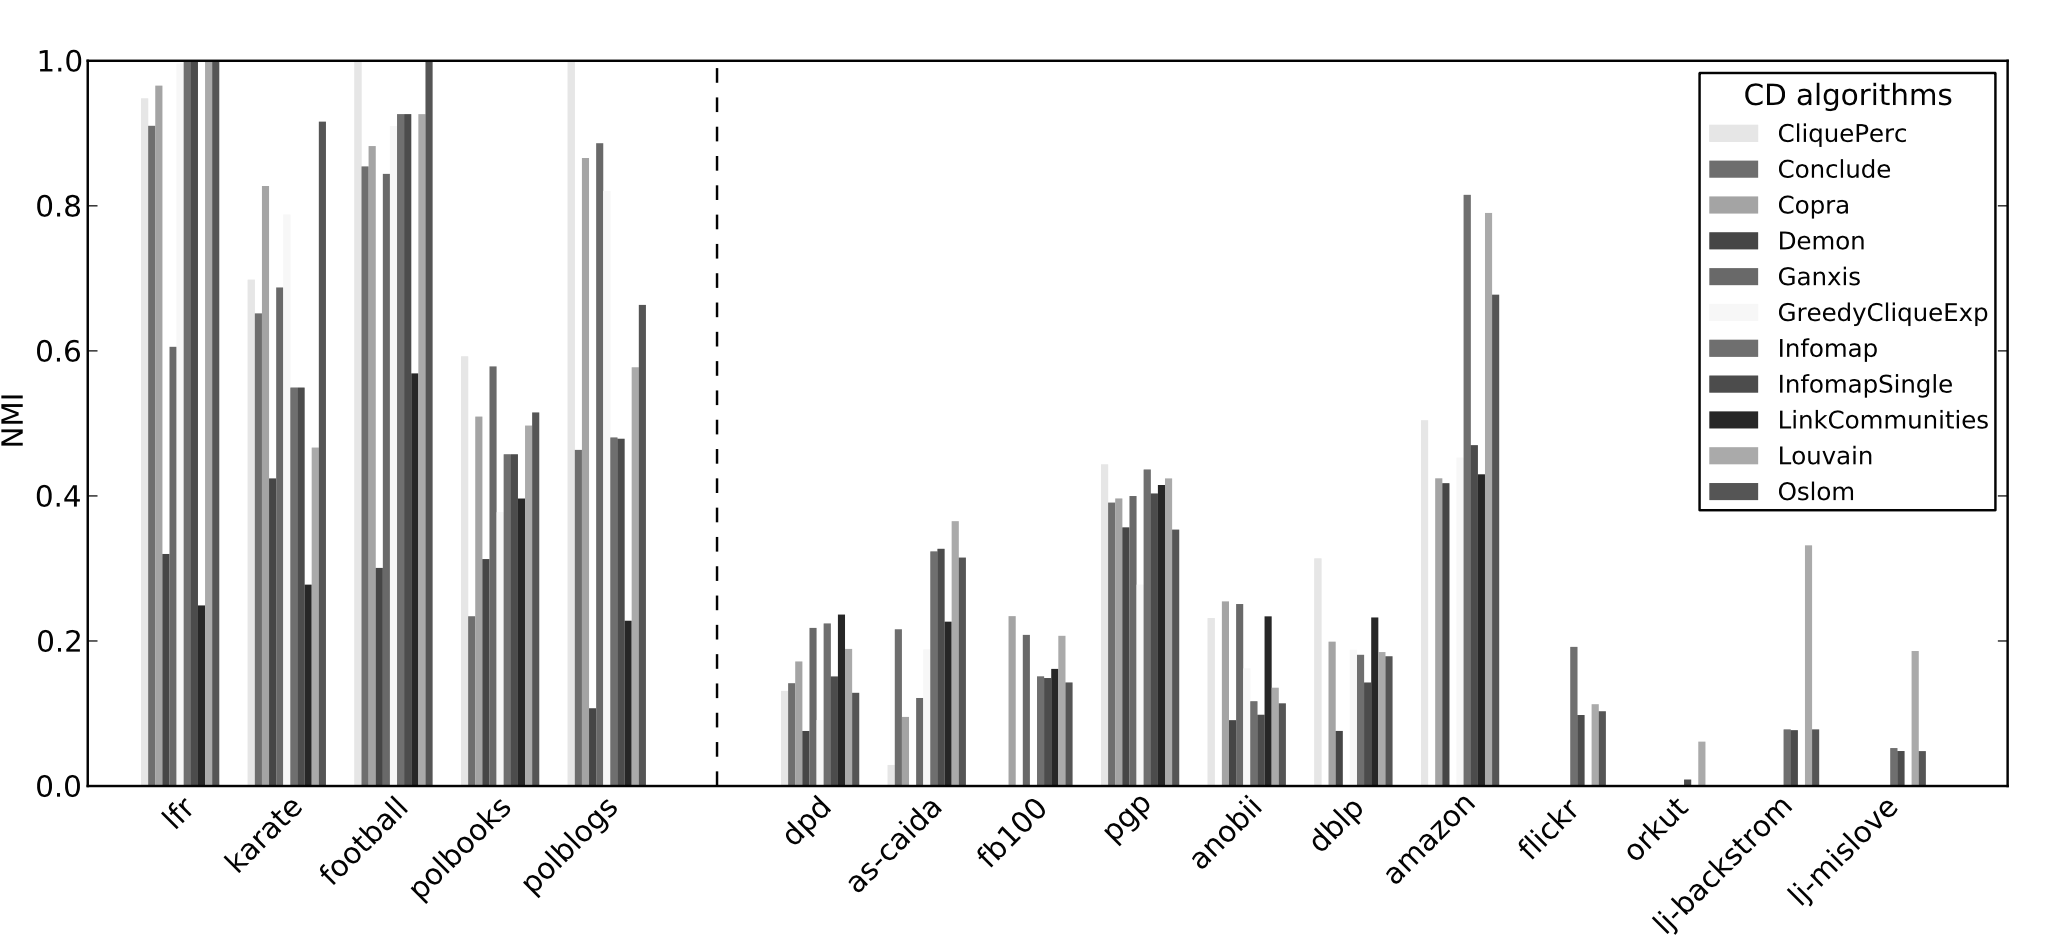

In [2]:
pip install cdlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.9 MB/s eta 0:00:00


In [3]:
import utils
import networkx as nx

# convert to undirected (difficult to define communities in DiGraph)
nets = [nx.Graph(utils.read_pajek(name)) for name in ["cdn_java", "wikileaks", "dormitory"]]

In [6]:
from cdlib import algorithms

# see https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/node_clustering.html
algs = {"Known": lambda G: utils.known_clustering(G), "Infomap": algorithms.infomap,
        "Louvain": algorithms.louvain, "LPA": algorithms.label_propagation}
        # "Leiden": algorithms.leiden, "FLPA": utils.fast_label_propagation

# NOTE: this wasn't properly tested, as cdlib is a nightmare to install.

for G in nets:
    utils.info(G)
    utils.CD_comparison(G, algs, runs = 10)

       Graph | 'cdn_java'
       Nodes | 1,516 (iso=0)
       Edges | 10,049 (loop=0)
      Degree | 13.26 (max=1,315)
         LCC | 100.0% (n=1)
  Clustering | 0.6851

   Algorithm | Count   Q      NMI    ARI    VI  
     'Known' |    54  0.210  1.000  1.000  0.000
   'Infomap' |    60  0.430  0.581  0.137  3.990
   'Louvain' |    11  0.455  0.438  0.143  4.578
       'LPA' |     1  0.000  0.000  0.000  5.049

       Graph | 'wikileaks'
       Nodes | 52,416 (iso=0)
       Edges | 78,506 (loop=0)
      Degree | 3.00 (max=384)
         LCC | 100.0% (n=1)
  Clustering | 0.1847

   Algorithm | Count   Q      NMI    ARI    VI  
     'Known' |   246  0.818  1.000  1.000  0.000
   'Infomap' |  4334  0.881  0.652  0.043  6.473
   'Louvain' |   172  0.978  0.699  0.468  4.175
       'LPA' | 11134  0.735  0.632  0.026  7.280

       Graph | 'dormitory'
       Nodes | 11,219 (iso=0)
       Edges | 663,336 (loop=0)
      Degree | 118.25 (max=1,061)
         LCC | 100.0% (n=1)
  Clustering | 0.1

Results we obtain are listed bellow:


|    Graph    |      Nodes      |      Edges      |      Degree      |      LCC      |  Clustering  |
| :---------: | :-------------: | :-------------: | :--------------: | :-----------: | :----------: |
|  cdn_java   |   1,516 (0)    |   10,151 (0)   |   13.39 (1,322)   | 100.0% (1) |    0.6851    |

<br>

|  Algorithm  |     Count     |        Q        |       NMI       |       ARI       |       VI       |
| :---------: | :-----------: | :-------------: | :-------------: | :-------------: | :-------------: |
|   'Known'   |      54       |     0.208       |      1.000      |      1.000      |      0.000      |
|  'Infomap'  |      51       |     0.424       |      0.561      |      0.186      |      4.204      |
|  'Louvain'  |      12       |     0.445       |      0.452      |      0.155      |      4.504      |
|  'Leiden'   |      13       |     0.458       |      0.441      |      0.128      |      4.589      |
|    'LPA'    |      1        |     -0.010      |      0.000      |      0.000      |      5.049      |
|   'FLPA'    |      3        |     0.208       |      0.103      |      0.007      |      5.046      |

<br><br>

|    Graph    |      Nodes      |      Edges      |      Degree      |      LCC      |  Clustering  |
| :---------: | :-------------: | :-------------: | :--------------: | :-----------: | :----------: |
|  wikileaks  |  52,416 (0)   |  78,506 (0)   |     3.00 (384)      | 100.0% (1) |    0.1864    |

<br>

|  Algorithm  |     Count     |        Q        |       NMI       |       ARI       |       VI       |
| :---------: | :-----------: | :-------------: | :-------------: | :-------------: | :-------------: |
|   'Known'   |     246       |     0.818       |      1.000      |      1.000      |      0.000      |
|  'Infomap'  |     32        |     0.951       |      0.577      |      0.293      |      4.908      |
|  'Louvain'  |     173       |     0.978       |      0.699      |      0.465      |      4.178      |
|  'Leiden'   |     182       |     0.979       |      0.701      |      0.464      |      4.175      |
|    'LPA'    |    11134      |     0.735       |      0.632      |      0.026      |      7.280      |
|   'FLPA'    |    8671       |     0.778       |      0.636      |      0.028      |      7.075      |

<br><br>

|    Graph    |      Nodes      |      Edges      |      Degree      |      LCC      |  Clustering  |
| :---------: | :-------------: | :-------------: | :--------------: | :-----------: | :----------: |
| dormitory   | 11,219 (0)  | 663,336 (0) | 118.25 (1,061) | 100.0% (1) |    0.1973    |

<br>

|  Algorithm  |     Count     |        Q        |       NMI       |       ARI       |       VI       |
| :---------: | :-----------: | :-------------: | :-------------: | :-------------: | :-------------: |
|   'Known'   |      66       |     0.138       |      1.000      |      1.000      |      0.000      |
|  'Infomap'  |      32       |     0.398       |      0.193      |      0.037      |      5.595      |
|  'Louvain'  |      8        |     0.452       |      0.163      |      0.032      |      5.843      |
|  'Leiden'   |      8        |     0.450       |      0.167      |      0.033      |      5.735      |
|    'LPA'    |      10       |     0.083       |      0.185      |      0.033      |      4.066      |
|   'FLPA'    |      8        |     0.153       |      0.187      |      0.036      |      4.228      |

<br><br>

We didn't detect the software packages in `cdn_java` as separate communities, because a software dependency graph usually forms some kind of multipartite structure. For example, a package with algorithms will depend on a package with datatypes (for its function signatures), however there is no reason to expect algorithms to depend on other algorithms etc.

For `dormitory`, the results are also pretty much useless (see the normalized mutual information column, which is quite similar across algorithms).

The main problem here is the we want these algorithms to detect some partition that *we* devised. In the case of `dormitory`, the nodes are labeled by a given student's dorm, while an algorithm could just as well detect some other type of partitioning (eg. by gender or age).